# Fashion MNIST

In [1]:
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import os

### Tensorboard
#### Create a log dir and a log file for the current running instance
#### Tensorboard callback for visualization

In [2]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("fashion_mnist__mlp_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

# Do it dynamically while fitting
# run_logdir = get_run_logdir()
# tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape, X_train.dtype

((60000, 28, 28), dtype('uint8'))

In [5]:
X_train = X_train / 255.0

For fashion MNIST, we need the list of class names to know the mapping between number back to class names

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Classification MLP. Neural network model with two hidden layers

In [7]:
# inputs= keras.layers.Input(shape=(28,28))
# layers = keras.layers.Flatten()
# layers = keras.layers.Dense(300, activation="relu")(layers)
# layers = keras.layers.Dense(100, activation="relu")(layers)
# layers = keras.layers.Dense(10, activation="softmax")(layers)
# model = keras.Model(inputs=inputs, outputs=layers)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [9]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, callbacks=[keras.callbacks.TensorBoard(get_run_logdir())])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 61us/sample - loss: 1.4430 - accuracy: 0.5904 - val_loss: 1.0006 - val_accuracy: 0.6876
Epoch 2/30
48000/48000 [==============================] - 3s 53us/sample - loss: 0.8769 - accuracy: 0.7145 - val_loss: 0.7802 - val_accuracy: 0.7393
Epoch 3/30
48000/48000 [==============================] - 2s 52us/sample - loss: 0.7395 - accuracy: 0.7546 - val_loss: 0.6950 - val_accuracy: 0.7621
Epoch 4/30
48000/48000 [==============================] - 2s 52us/sample - loss: 0.6707 - accuracy: 0.7768 - val_loss: 0.6438 - val_accuracy: 0.7818
Epoch 5/30
48000/48000 [==============================] - 2s 52us/sample - loss: 0.6257 - accuracy: 0.7911 - val_loss: 0.6060 - val_accuracy: 0.7949
Epoch 6/30
48000/48000 [==============================] - 2s 52us/sample - loss: 0.5928 - accuracy: 0.8016 - val_loss: 0.5797 - val_accuracy: 0.8018
Epoch 7/30
48000/48000 [==============================] 

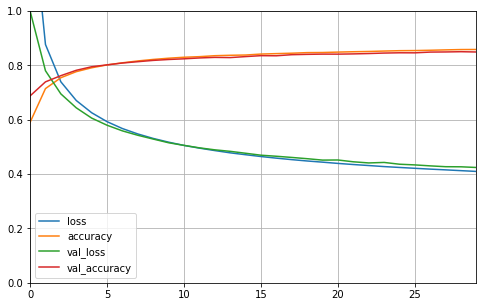

In [10]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()